In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCVs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master.csv
Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master.csv


In [ ]:
testDF = pd.read_csv('customer_churn_dataset-testing-master.csv').copy()
trainDF = pd.read_csv('customer_churn_dataset-training-master.csv').copy()

Since there is significant drift between training and testing datasets, we will merge the datasets and split ourselves.

In [ ]:
df = pd.concat([trainDF, testDF])
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [ ]:
df.dropna(axis = 0 , inplace = True)
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [ ]:
y = df['Churn']
x = df.drop(columns = 'Churn')

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=23)
x1_train.reset_index(drop=True, inplace=True)
x1_test.reset_index(drop=True, inplace=True)
y1_train.reset_index(drop=True, inplace=True)
y1_test.reset_index(drop=True, inplace=True)

In [ ]:
x1_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,99806.0,19.0,Female,48.0,7.0,3.0,30.0,Premium,Annual,787.00,29.0
1,32850.0,65.0,Female,11.0,20.0,9.0,14.0,Standard,Monthly,562.00,13.0
2,358272.0,38.0,Male,8.0,20.0,1.0,4.0,Basic,Quarterly,961.86,8.0
3,233775.0,38.0,Female,59.0,25.0,10.0,4.0,Premium,Annual,706.00,14.0
4,27624.0,46.0,Male,38.0,24.0,10.0,16.0,Standard,Annual,260.00,25.0
...,...,...,...,...,...,...,...,...,...,...,...
404159,345986.0,24.0,Female,1.0,4.0,2.0,18.0,Standard,Quarterly,740.72,15.0
404160,229006.0,62.0,Male,29.0,23.0,9.0,24.0,Standard,Quarterly,327.10,11.0
404161,278515.0,34.0,Male,13.0,16.0,1.0,6.0,Premium,Quarterly,520.36,23.0
404162,131866.0,35.0,Male,23.0,18.0,4.0,10.0,Standard,Monthly,420.00,3.0


In [ ]:
x1_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,149265.0,58.0,Male,2.0,20.0,6.0,24.0,Standard,Quarterly,664.00,20.0
1,62074.0,52.0,Male,14.0,13.0,2.0,13.0,Standard,Monthly,650.00,9.0
2,337290.0,46.0,Male,38.0,3.0,0.0,9.0,Basic,Annual,571.47,24.0
3,188847.0,29.0,Female,59.0,27.0,5.0,22.0,Basic,Quarterly,502.00,2.0
4,373476.0,42.0,Male,29.0,7.0,1.0,20.0,Basic,Annual,541.34,10.0
...,...,...,...,...,...,...,...,...,...,...,...
101037,322505.0,29.0,Male,33.0,9.0,1.0,1.0,Basic,Annual,801.41,29.0
101038,105305.0,34.0,Male,43.0,28.0,9.0,11.0,Standard,Annual,435.00,30.0
101039,421901.0,50.0,Female,40.0,13.0,0.0,1.0,Premium,Quarterly,651.28,9.0
101040,405645.0,49.0,Female,46.0,6.0,0.0,20.0,Standard,Quarterly,897.68,2.0


In [ ]:
df['Total Spend / Age'] = df['Total Spend'] / df['Age']
df['Age / Usage Frequency'] = df['Age'] / df['Usage Frequency']
df['Total Spend / Usage Frequency'] = df['Total Spend'] / df['Usage Frequency']
df['Support Calls/ Age']  = df['Support Calls'] / df['Age']


In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2, random_state=23)


In [ ]:
nums1 = x1_train.select_dtypes(include=['number']).columns.to_list()
nums2 = x1_train.select_dtypes(include=['number']).columns.to_list()

In [ ]:
cats1  = df.select_dtypes(include=['object']).columns.to_list()
cats2 = df.select_dtypes(include=['object']).columns.to_list()


            Feature  KS Statistic
0        CustomerID      0.002455
1               Age      0.002824
2            Tenure      0.003290
3   Usage Frequency      0.003487
4     Support Calls      0.003864
5     Payment Delay      0.001474
6       Total Spend      0.003251
7  Last Interaction      0.002189


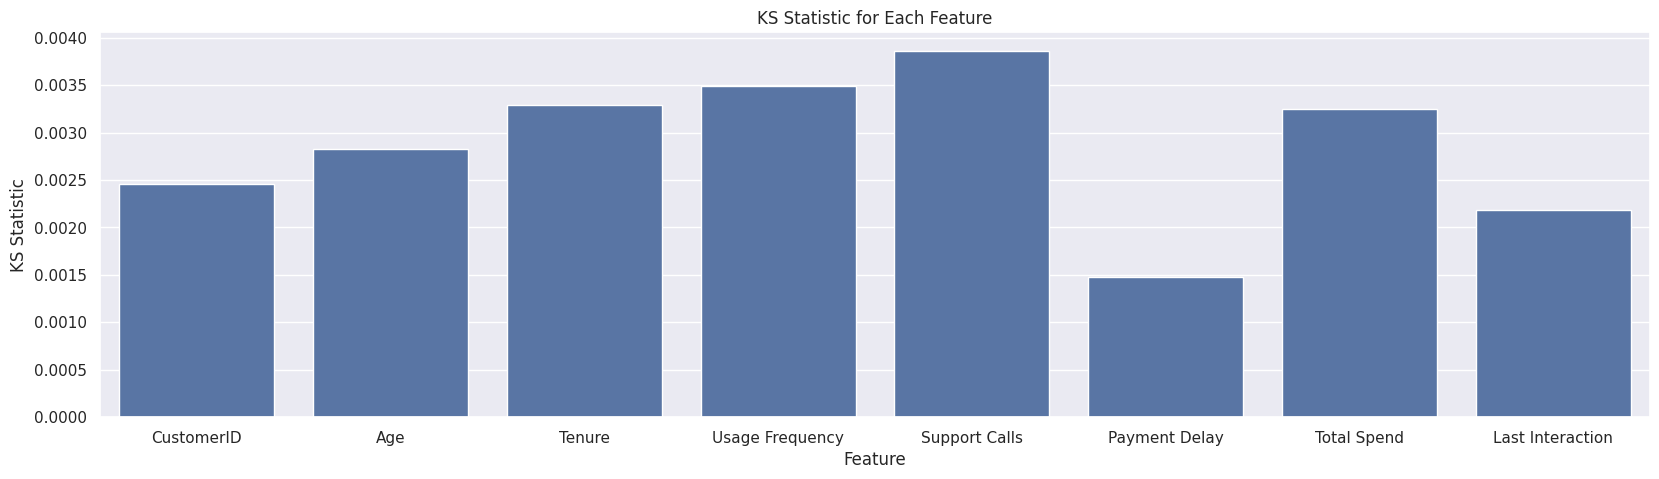

In [ ]:

from scipy.stats import ks_2samp
ks_results = []
for col in nums1:
    ks_stat, p_value = ks_2samp(x1_train[col], x1_test[col])
    ks_results.append((col, ks_stat))
ks_df = pd.DataFrame(ks_results, columns=['Feature', 'KS Statistic'])

print(ks_df)

plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='KS Statistic', data=ks_df)
plt.title('KS Statistic for Each Feature')
plt.show()

Through merging and then splitting the datasets, the data drift seems to have significantly decreased. The KS statistic now does not exceed 0.004 which indicates that there is significantly more correlation between the training and test datasets now and much less drift.

In [ ]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404164 entries, 0 to 404163
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404164 non-null  float64
 1   Age                404164 non-null  float64
 2   Gender             404164 non-null  object 
 3   Tenure             404164 non-null  float64
 4   Usage Frequency    404164 non-null  float64
 5   Support Calls      404164 non-null  float64
 6   Payment Delay      404164 non-null  float64
 7   Subscription Type  404164 non-null  object 
 8   Contract Length    404164 non-null  object 
 9   Total Spend        404164 non-null  float64
 10  Last Interaction   404164 non-null  float64
dtypes: float64(8), object(3)
memory usage: 33.9+ MB
